<a href="https://colab.research.google.com/github/LeiRabe/PythonProject/blob/master/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reminder:**
Don't forget to import the local data

**Data exploration**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
#load the data from local 
happiness_data = pd.read_csv("/content/world-happiness-report-2021.csv")
#shape 149 rows, 20 columns
print(happiness_data.shape)
happiness_data.columns

(149, 20)


Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

## Renommage des columns pour plus de compréhension

1. Logged GDP per capita -> PIB par habitant

**Explication:** Le PIB par habitant est une mesure qui permet de déterminer la production économique d'un pays pour chaque personne qui y vit. Souvent, les nations riches à faible population ont tendance à avoir un PIB par habitant plus élevé. Plus le PIB est élévé, mieux c'est pour le pays (économiquement parlant)

2. social support -> aide social

**Explication:** L'aide sociale est un système de solidarité nationale qui apporte assistance aux personnes confrontées à des difficultés d'ordre social et matériel. *Source: sante.lefigaro.fr*


3. Healthy life expectancy -> Espérance de vie saine

**Explication:** Elle représente la durée de vie moyenne en bonne santé. *Source: insee.fr* 

4. Freedom to make life choices -> Liberté choix de vie

**Explication:** La liberté de faire des choix de vie parle pa elle même.

5. Generosity -> Générosité

**Eplication:** La générosité moyenne des habitants dans le pays.

6. Perceptions of corruption -> Corruption

**Explication:** Perceptions de la corruption sont des indices qui montrent le degré de corruption perçue dans les administrations publiques et la classe politique. *Source: transparency-france.org*

7. Ladder score -> Score 

**Explication:** Score à l'échelle représente le rang, en quelque sorte. Plus le score est élévé, plus le pays est heureux et la contraposé est valable également.


In [58]:
#rename columns based on the indications above
happiness_data=happiness_data.rename(columns={"Country name": "country","Ladder score": "score", "Logged GDP per capita": "PIB par habitant", "social support": "aide social", "Healthy life expectancy": "Espérance de vie saine", "Freedom to make life choices": "Liberté choix de vie", "Generosity": "Générosité", "Perceptions of corruption": "Corruption"})

In [86]:
#TODO:
# upper case and join with _
# remove unused col
# rename the not renamed

In [43]:
##number of unique countries
countries_nb = happiness_data["Country name"].nunique()
print(countries_nb)

149


**Visualization**
1. Classement des 50 pays les plus plus malheureux en fonction du classement donnée qui se trouve dans la colonne: Ladder score
2. Classement des 50 pays les plus plus heureux en fonction du classement donnée qui se trouve dans la colonne: Ladder score
3. Affichage des 9 pays les plus heureux (dont le Ladder score est élévé) avec un nuage de mot
4. Projection sur une carte du monde la visualisation des continents où se trouve les pays heureux, moyennement heureux et malheureux.

<function matplotlib.pyplot.show>

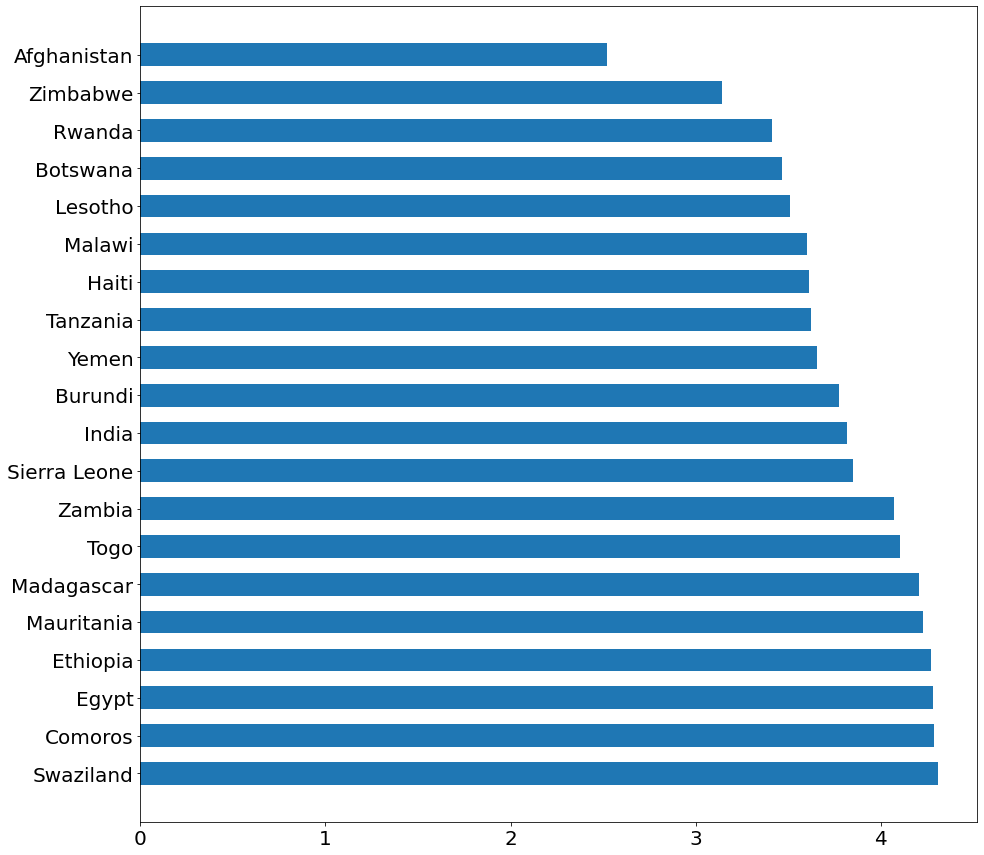

In [84]:
score = np.array(happiness_data["score"])
countries = np.array(happiness_data["country"])
plt.figure(figsize=(15,15))
plt.barh(countries[-20:],score[-20:],height = 0.6)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20) 
plt.show
#TODO: change the colors of the bars

<function matplotlib.pyplot.show>

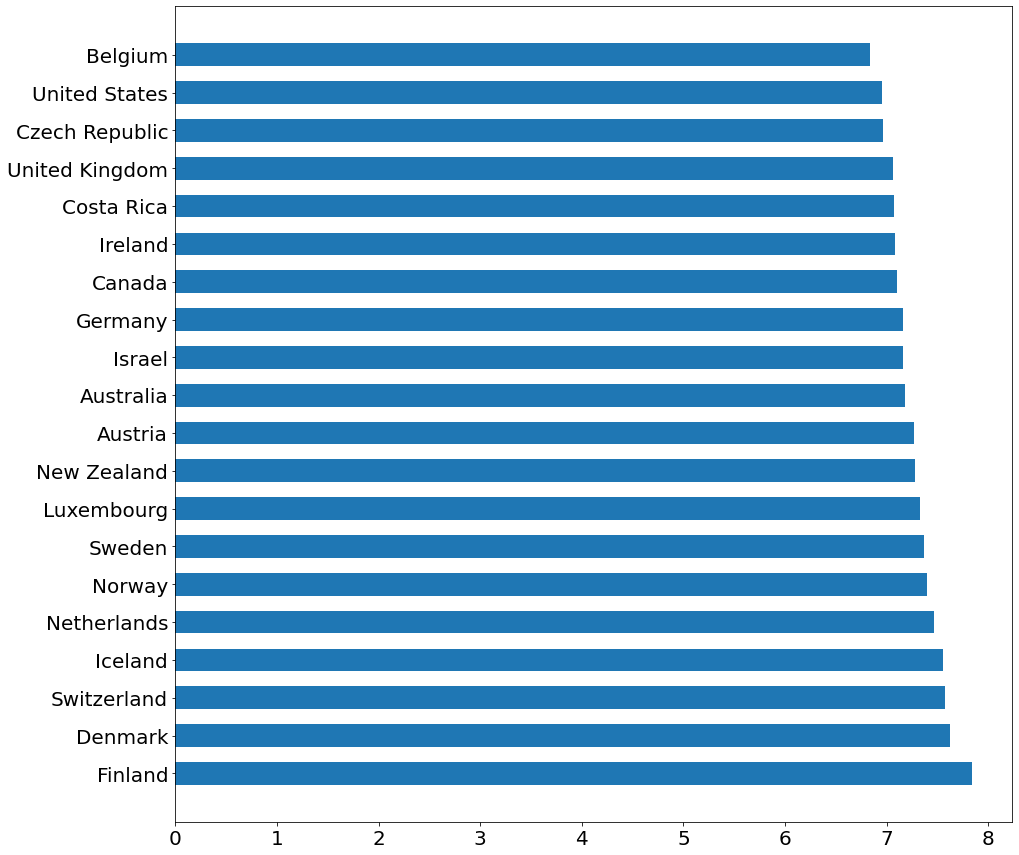

In [83]:
score = np.array(happiness_data["score"])
countries = np.array(happiness_data["country"])
plt.figure(figsize=(15,15))
plt.barh(countries[:20],score[:20],height = 0.6)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20) 
plt.show
#TODO: change the colors of the bars

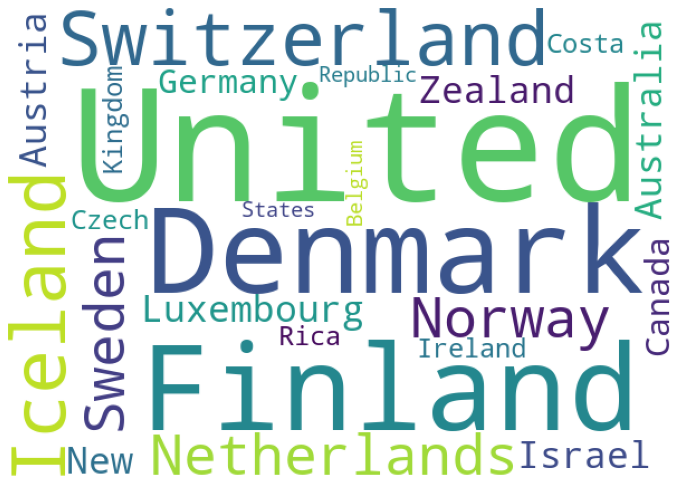

In [77]:
country_display = countries[:20]
plt.subplots(figsize=(12,25))
word_cloud = WordCloud(background_color='white',
                          width=600,
                          height=430
                         ).generate(" ".join(country_display))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()
# TODO: replace Uited kingdom by UK or add - to all two-words named countries